In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import your dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,mon,1.283333,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,fri,0.200000,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,4.616667,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,thu,1.166667,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,fri,19.683333,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [4]:
test.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,mon,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,thu,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,fri,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [5]:
train.isnull().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [6]:
test.isnull().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [7]:
print("Shape of Train Data: ", train.shape)
print("Shape of Test Data: ", test.shape)

Shape of Train Data:  (28831, 22)
Shape of Test Data:  (12357, 21)


In [8]:
combine_data = pd.concat([train, test])
combine_data.shape

(41188, 22)

<AxesSubplot:>

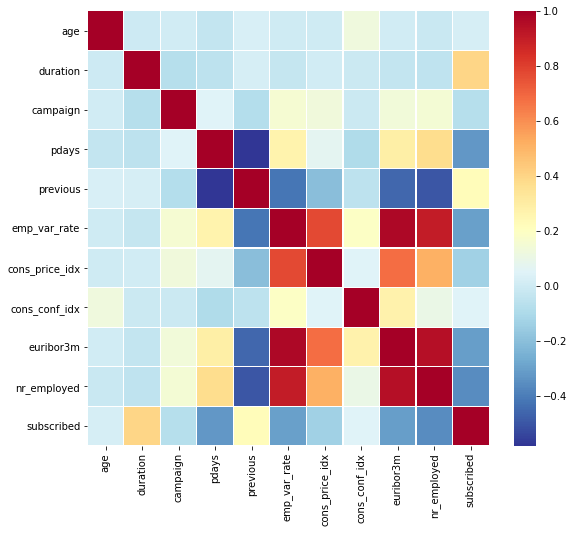

In [9]:
# Correlation Matrix
corrmat  = train.corr()
f, ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat, ax=ax, cmap="RdYlBu_r", linewidths=0.1)

In [10]:
train.columns

Index(['customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

In [11]:
train["job"].unique()

array(['admin.', 'technician', 'blue-collar', 'services', 'entrepreneur',
       'unemployed', 'housemaid', 'management', 'unknown',
       'self-employed', 'retired', 'student'], dtype=object)

In [12]:
train["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [13]:
train["education"].unique()

array(['university.degree', 'basic.6y', 'high.school', 'basic.4y',
       'professional.course', 'basic.9y', 'unknown', 'illiterate'],
      dtype=object)

In [14]:
#Dropping euribor3m, nr_employed, and emp_var_rate since they're highly correlated
selected_columns = ['age', 'job', 'marital', 'default','housing', 'loan', 'contact', 
                    'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous',
                    'poutcome','cons_price_idx', 'cons_conf_idx'
                   ]

In [15]:
#Replacing combine_data with the selected columns
combine_data2 = combine_data[selected_columns]
combine_data2.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx
0,31,admin.,married,no,no,no,cellular,dec,mon,1.283333,3,999,1,failure,46.3565,-23.10
1,31,technician,single,no,no,no,telephone,may,fri,0.200000,4,999,0,nonexistent,46.4465,-32.34
2,47,blue-collar,married,unknown,yes,no,telephone,may,thu,4.616667,2,999,0,nonexistent,46.9970,-25.48
3,36,services,married,no,no,no,cellular,may,thu,1.166667,1,999,1,failure,46.4465,-32.34
4,34,admin.,single,no,no,no,cellular,may,fri,19.683333,9,999,0,nonexistent,46.4465,-32.34


In [16]:
#Converting all categorical variables to numerical
combine_data3 = pd.get_dummies(combine_data2)
combine_data3

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,46.3565,-23.10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,31,0.200000,4,999,0,46.4465,-32.34,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,47,4.616667,2,999,0,46.9970,-25.48,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,36,1.166667,1,999,1,46.4465,-32.34,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,34,19.683333,9,999,0,46.4465,-32.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,48,3.016667,2,999,0,46.9590,-29.89,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12353,40,10.333333,1,2,1,46.5375,-32.97,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
12354,28,4.183333,2,999,0,46.9590,-29.89,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12355,53,0.833333,3,999,0,46.7220,-25.27,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [17]:
combine_data3.describe()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,42.02406,4.304750,2.567593,962.475454,0.172963,46.787832,-28.351820,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,4.321321,2.770014,186.910907,0.494901,0.289420,3.239738,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,19.00000,0.000000,1.000000,0.000000,0.000000,46.100500,-35.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.700000,1.000000,999.000000,0.000000,46.537500,-29.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,40.00000,3.000000,2.000000,999.000000,0.000000,46.874500,-29.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.00000,5.316667,3.000000,999.000000,0.000000,46.997000,-25.480000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000

In [18]:
#Seperating the processed train and test data from combine_data3
train2 = combine_data3.iloc[0:28831, :]
test2 = combine_data3.iloc[28831:, :]

In [19]:
print("Shape of train2:", train2.shape)
print("Shape of test2:", test2.shape)

Shape of train2: (28831, 52)
Shape of test2: (12357, 52)


In [20]:
train2.head()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,46.3565,-23.10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,31,0.200000,4,999,0,46.4465,-32.34,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,47,4.616667,2,999,0,46.9970,-25.48,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,36,1.166667,1,999,1,46.4465,-32.34,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,34,19.683333,9,999,0,46.4465,-32.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [21]:
test2.head()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,59,6.183333,1,999,1,46.4465,-32.34,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,57,4.750000,2,999,0,46.9970,-25.48,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,35,0.866667,1,999,1,46.4465,-32.34,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,38,5.916667,4,999,0,47.2325,-29.26,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,29,3.150000,2,999,0,46.9590,-29.89,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
SC = MinMaxScaler()
train3 = pd.DataFrame(SC.fit_transform(train2), columns=train2.columns)
train3.head()

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [23]:
X = train2
y = train["subscribed"].values
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (20181, 52)
y_train shape: (20181,)
X_test shape: (8650, 52)
y_test shape: (8650,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Logistic_Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = round(metrics.accuracy_score(y_test, y_pred_lr)*100, 2)
lr_f1 = metrics.f1_score(y_test, y_pred_lr)
print(acc_lr)
print(lr_f1)

90.17
0.4272237196765498


In [27]:
#Naive_Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

nb_acc = round(metrics.accuracy_score(y_test, y_pred_nb)*100, 2)
nb_f1 = metrics.f1_score(y_test, y_pred_nb)
print(nb_acc)
print(nb_f1)

86.06
0.4262607040913416


In [28]:
#XGBC
xgbc = XGBClassifier(use_label_encoder=False)
xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)

xgbc_acc = round(metrics.accuracy_score(y_test, y_pred_xgbc)*100, 2)
xgbc_f1 = metrics.f1_score(y_test, y_pred_xgbc)
print(xgbc_acc)
print(xgbc_f1)

[16:16:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.87
0.5576707726763718


In [29]:
#Gradient_Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

gbc_acc = round(metrics.accuracy_score(y_test, y_pred_gbc)*100, 2)
gbc_f1 = metrics.f1_score(y_test, y_pred_gbc)
print(gbc_acc)
print(gbc_f1)

90.98
0.5340501792114696


In [30]:
#Random_Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

rfc_acc = round(metrics.accuracy_score(y_test, y_pred_rfc)*100, 2)
rfc_f1 = metrics.f1_score(y_test, y_pred_rfc)
print(rfc_acc)
print(rfc_f1)

90.66
0.5252643948296122


In [31]:
#Decision_Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

dtc_acc = round(metrics.accuracy_score(y_test, y_pred_dtc)*100, 2)
dtc_f1 = metrics.f1_score(y_test, y_pred_dtc)
print(dtc_acc)
print(dtc_f1)

88.34
0.5007422068283028


In [32]:
#Cat_Boost_Classifier
cat = CatBoostClassifier(random_seed = 10, n_estimators = 1000)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

cat_acc = round(metrics.accuracy_score(y_test, y_pred_cat)*100, 2)
cat_f1 = metrics.f1_score(y_test, y_pred_cat)
print(cat_acc)
print(cat_f1)

Learning rate set to 0.037166
0:	learn: 0.6481440	total: 670ms	remaining: 11m 9s
1:	learn: 0.6044543	total: 682ms	remaining: 5m 40s
2:	learn: 0.5682345	total: 693ms	remaining: 3m 50s
3:	learn: 0.5338898	total: 702ms	remaining: 2m 54s
4:	learn: 0.5048203	total: 713ms	remaining: 2m 21s
5:	learn: 0.4711085	total: 723ms	remaining: 1m 59s
6:	learn: 0.4457548	total: 733ms	remaining: 1m 43s
7:	learn: 0.4214435	total: 743ms	remaining: 1m 32s
8:	learn: 0.4023805	total: 753ms	remaining: 1m 22s
9:	learn: 0.3830027	total: 763ms	remaining: 1m 15s
10:	learn: 0.3712157	total: 774ms	remaining: 1m 9s
11:	learn: 0.3544646	total: 784ms	remaining: 1m 4s
12:	learn: 0.3391753	total: 799ms	remaining: 1m
13:	learn: 0.3245949	total: 814ms	remaining: 57.3s
14:	learn: 0.3136514	total: 825ms	remaining: 54.2s
15:	learn: 0.3052097	total: 835ms	remaining: 51.3s
16:	learn: 0.2971497	total: 845ms	remaining: 48.8s
17:	learn: 0.2896532	total: 856ms	remaining: 46.7s
18:	learn: 0.2833729	total: 868ms	remaining: 44.8s
19:	

In [33]:
#Support_Vector_Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_acc = round(metrics.accuracy_score(y_test, y_pred_svm)*100, 2)
svm_f1 = metrics.f1_score(y_test, y_pred_svm)
print(svm_acc)
print(svm_f1)

89.35
0.2942528735632184


In [34]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_acc = round(metrics.accuracy_score(y_test, y_pred_knn)*100, 2)
knn_f1 = metrics.f1_score(y_test, y_pred_knn)
print(knn_acc)
print(knn_f1)

89.9
0.4778972520908004


In [80]:
models = pd.DataFrame({'Model': [ 'Logistic Regression', 'Naive Bayes', 'XGB Classifier','Gradient Boosting Classifier',
                                 'Random Forest', 'Decision Tree', 'CatBoost Classifier','Support Vector Machine','KNN'
                                ],
                       'Accuracy_Score': [acc_lr, nb_acc, xgbc_acc, gbc_acc, rfc_acc, dtc_acc, cat_acc, svm_acc, knn_acc],
                       'F1_Score': [lr_f1, nb_f1, xgbc_f1, gbc_f1, rfc_f1, dtc_f1, cat_f1, svm_f1, knn_f1]
                      })

models.sort_values(by='F1_Score', ascending=False)

,Model,Accuracy_Score,F1_Score
6,CatBoost Classifier,91.01,0.558456
2,XGB Classifier,90.87,0.557671
3,Gradient Boosting Classifier,90.98,0.534050
4,Random Forest,90.66,0.525264
5,Decision Tree,88.34,0.500742
8,KNN,89.90,0.477897
0,Logistic Regression,90.17,0.427224
1,Naive Bayes,86.06,0.426261
7,Support Vector Machine,89.35,0.294253


In [56]:
y_sub = cat.predict(test2)
y_sub.shape

(12357,)

In [57]:
sub_cat = pd.read_csv("sample_submission.csv")
sub_cat["subscribed"] = y_sub
sub_cat.to_csv("sub_cat.csv", index=False)

In [58]:
y_sub1  = xgbc.predict(test2)
y_sub1.shape

(12357,)

In [ ]:
sub_xgbc = pd.read_csv("sample_submission.csv")
sub_xgbc["subscribed"] = y_sub
sub_xgbc.to_csv("sub_xgbc.csv", index=False)

**CatBoostingClassifier()** performed better with a private and public leader board of **0.91537** & **0.91745** respectively.

**XGBClassifier()** was second with private and public leaderboard of **0.91225** & **0.91367** respectively.

## Note:
Perform further analysis like:
- Data Cleaning and Wrangling e.g check correlation to ascertain columns to drop or retain where applicable
- Future Engineering e.g. Standard Scalling etc.
- Stacking, Blending or Voting.
- etc